# Section 0

مطابق رابطه اول تابع خطی را می توان به صورت ضرب دو ماتریس نوشت.برای این کار یک عدد یک برای ضریب ثابت تضافه می کنیم. با جایگذاری آن در رابطه اصلی رگرسیون حاصل را به صورت ضرب دو ماتریس می توان ساده کرد.

\begin{equation*}
  f(x^i)=β_0 + \beta_{11} x_1^i + ... + \beta_{1P} x_P^i = 
  \begin{bmatrix}
		 1 & x_1^i & ... & x_P^i \\
	\end{bmatrix}
	.
	\begin{bmatrix}
		\beta_0 \\
    \beta_{11}\\
    … \\
		\beta_{1P} \\
	\end{bmatrix}
  = X^i . β
  \\
  RSS= \sum_i (y_i -f(x_i))^2 =
	\begin{bmatrix}
		 y^1 -f(x^1) & ... & y^n -f(x^n) \\
	\end{bmatrix}
	.
	\begin{bmatrix}
		y^n -f(x^n) \\
    … \\
		y^n -f(x^n) \\
	\end{bmatrix}
	=
	(y - X. β)^T . (y - X. β)
\end{equation*}

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from functools import reduce
import skimage
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, metrics
from skimage.io import imread
from skimage.io import imshow
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.decomposition import PCA
import pprint
import pandas as pd
pp = pprint.PrettyPrinter(indent=4)

# Section 1

In [15]:
data=pd.read_csv('drive/MyDrive/ml/ozon.csv')
#data=pd.read_csv('drive/MyDrive/CVLab/LAB2/ozon.csv')
data=data.to_numpy()

## Part 1

در این قسمت داده هارا از فایل می خوانیم و به صورت رندوم 80 درصد را به عنوان داده ترین و باقی را به عنوان داده تست جداسازی می کنیم

In [41]:
#implementing regression 
Y=data[:,3:4]
X=data[:,0:3]
X1=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
#print(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,Y ,test_size=0.2,random_state=42)

در ادامه تابع رگرسیون را به صورت دستی محاسبه می کنیم. تابع خطی بدست آمده به صورت زیر خواهد بود:
$$ f(x) = -60.99 + 0.06 x_1 + 1.62 x_2 -3.45 x_3$$
 به این ترتیب خطای داده ترین 481 و خطای داده تست 245 خواهد شد.

In [42]:
A= np.transpose(X_train1) @ X_train1
B= np.transpose(X_train1) @ y_train1
beta = np.linalg.inv(A) @ B
print(beta)

#emperical risk and true risk
emperical_risk = np.sum((X_train1 @ beta - y_train1)**2)/np.shape(X_train1)[0]
print('train error = {}'.format(emperical_risk))

true_risk = np.sum((X_test1 @ beta - y_test1)**2)/np.shape(X_test1)[0]
print('test error = {}'.format(true_risk))

[[-60.99239109]
 [  0.06339674]
 [  1.6229136 ]
 [ -3.45349018]]
train error = 481.6297884493443
test error = 245.17289877643736


در ادامه از تابع رگرسیون آماده استفاده می کنیم. ضرایب تابع نهایی و خطاهای داده تست و ترین یکسان خواهند بود.

In [43]:
#using sklearn regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2,random_state=42)
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)
print('train error = {}'.format(mean_squared_error(model.predict(X_train),y_train)))
print('test error = {}'.format(mean_squared_error(model.predict(X_test),y_test)))

[[ 0.06339674  1.6229136  -3.45349018]]
[-60.99239109]
train error = 481.62978844934446
test error = 245.17289877643464


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


## Part 2

در این قسمت به لیبل ها که میزان ازن هوا می باشند، نویز با واریانس های مختلف اضافه کرده و رقتار تابع حاصل را مقایسه می کنیم.

مطابق نمودار خطا بر حسب واریانس نویز، با افزایش نویز به طور کلی خطای ترین و تست هر دو افزایش می یابد و این دو خطا به یکدیگر نزدیکتر خواهند شد.

البته این افزایش به دلیل متغیر بودن رفتار نویز همواره رخ نمی دهد و در مواردی خطا را کاهش می دهد اما به طور کلی خطا ها در حال افزایش می باشد.

In [ ]:
# adding noise to ozon
emp=[]
tru=[]
tru2=[]
v=np.linspace(0,50,201)

for i in v:
  ynoisy=y_train
  ynoisy=ynoisy+np.random.normal(size=(np.shape(ynoisy)))*np.sqrt(i)
  ytest=y_test
  ytest=ytest+np.random.normal(size=(np.shape(ytest)))*np.sqrt(i)
  model.fit(X_train,ynoisy)
  tru.append(mean_squared_error(model.predict(X_test),ytest))
  tru2.append(mean_squared_error(model.predict(X_test),y_test))
  emp.append(mean_squared_error(model.predict(X_train),ynoisy))

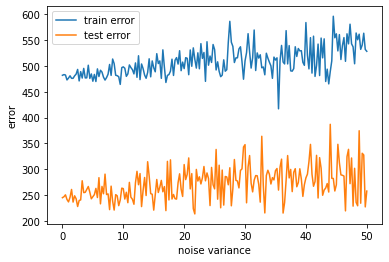

In [46]:
plt.plot(v,emp,label="train error")
plt.plot(v,tru,label="test error")
plt.ylabel('error')
plt.xlabel('noise variance')
plt.legend()
plt.show()


## Part 3

در این قسمت علاوه بر توابع خطی از 3 پارامتر توان های دوم آن هارا نیز اضافه می کنیم.

مطابق نتیجه خطای ترین (301) کاهش یافته و خطای تست (479) افزایش می یابد . به عبارتی مدل ما به سمت اورفیت شدن می رود. یعنی به داده ترین بسیار فیت شده اما این فیت شدن مدل را از حالت کلی و مدل واقعی دورتر می کند و در نتیجه خطای داده تست افزایش می یابد.

In [48]:
#adding power of 2 to features
from sklearn.preprocessing import PolynomialFeatures

#poly=PolynomialFeatures(degree=2,include_bias=True)
#X_train_trans=poly.fit_transform(X_train)
#X_test_trans=poly.fit_transform(X_test)

X_train_trans2=np.concatenate((X_train,X_train**2),axis=1)
X_test_trans2=np.concatenate((X_test,X_test**2),axis=1)

model = LinearRegression(normalize=True)
model.fit(X_train_trans2,y_train)
print(model.coef_)
print(model.intercept_)
print('train error = {}'.format(mean_squared_error(model.predict(X_train_trans2),y_train)))
print('test error = {}'.format(mean_squared_error(model.predict(X_test_trans2),y_test)))

[[ 1.49401472e-01 -8.51130784e+00 -1.72817607e+01 -2.51375082e-04
   6.54632484e-02  6.16689081e-01]]
[390.06376166]
train error = 301.0731846497046
test error = 479.98385823501246


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


# Section 2

In [4]:
dataPath = 'drive/MyDrive/CVLab/LAB1/Data/Cohn-Kanade/surprise videos'

## Part 1

در این بخش با استفاده از یک حلقه روی همه فایل های دایرکتوری های فریم های ویدیوهای سورپرایز، تک تک فریم ها را پس از تبدیل آن ها به تصاویر دو کاناله و برداری کردن آن ها ذخیره می کنیم. همچنین لازم است به هر فریم برچسبی را که نشان دهنده شدت تعجب است نسبت دهیم. در نتیجه با اسکیل کردن تعداد فریم های هر ویدیو به بازه ۰ تا ۱، به هر فریم برچسب متناطر با آن را می دهیم. بدین صورت که فریم با کمترین میزان تعجب برچسب ۰ می خورد و فریم با بیشترین میزان تعجب برچسب ۱ خواهد داشت. در نهایت پس از ذخیره سازی همه فریم ها و لیبل های آن ها، به صورت رندم ۶۰ درصد داده ها را به عنوان داده آموزش و ۴۰ درصد آن ها را به عنوان داده تست در نظر می گیریم.

در بخش اول از آنجا که از همه تصاویر با ابعاد اصلی آن استفاده می شود، به دلیل 
حجم خیلی زیاد دیتا، رم کرش می کند و نمی توان رگرسور را با این حجم دیتا آموزش داد. (در نتیجه پارت ۱ را ران نکنید!)

### Part 1 code (you will probably face RAM crash by running this part!)

In [ ]:
frames = []
labels = []
for file in os.listdir(dataPath):
  current_frames = []
  current_labels = []
  # number of total frames in a directory
  N = len(listdir(join(dataPath , file)))
  # setting counter to zero
  c = 0
  for frame in os.listdir(join(dataPath , file)):
    c = c+1
    frame_img = imread(join(dataPath , file, frame))
    # converting the frame image to grayscale
    frame_img = rgb2gray(frame_img)
    # vectorizing the frame
    frame_img = frame_img.reshape(frame_img.shape[0] * frame_img.shape[1], 1)
    # converting the frame number to 0-1 range to obtain its label
    label = (c-1)/(N-1)
    # saving frame image and its corresponding label
    current_frames.append(frame_img)
    current_labels.append(label)
  frames.append(current_frames)
  labels.append(current_labels)


In [ ]:
# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(frames, labels, test_size=0.4, random_state=42)

In [ ]:
# converting the nested lists into a single list
X_train = reduce(lambda x,y: x+y, X_train)
X_test = reduce(lambda x,y: x+y, X_test)
y_train = reduce(lambda x,y: x+y, y_train)
y_test = reduce(lambda x,y: x+y, y_test)

## Part 2

در این بخش برای خواندن و ذخیره سازی فریم ها مانند بخش قبل عمل می کنیم با این تفاوت که با تعریف کردن یک ماسک و اعمال آن روی هر فریم، از هر فریم فقط بخش صورت آن گرفته می شود. همچنین پس از اعمال ماسک، ابعاد تصویر به یک چهارم ابعاد اولیه آن کاهش می یابد و بعد از برداری شدن ذخیره می شود. همچنین مشابه قسمت قبل پس از ذخیره همه فریم ها و برچسب های متناظر با آن ها، ۶۰ درصد داده ها به صورت رندم به عنوان داده آموزش و ۴۰ درصد آن ها به عنوان داده تست ذخیره می شود.

In [49]:
frames = []
labels = []
for file in os.listdir(dataPath):
  current_frames = []
  current_labels = []
  # number of total frames in a directory
  N = len(listdir(join(dataPath , file)))
  # setting counter to zero
  c = 0
  for frame in os.listdir(join(dataPath , file)):
    c = c+1
    # reading the frame
    frame_img = imread(join(dataPath , file, frame))
    # converting the frame image to grayscale
    frame_img = rgb2gray(frame_img)
    # masking the image
    frame_img = frame_img[100:700, 400:800]
    # resizing the image
    frame_img = resize(frame_img, (0.25*frame_img.shape[0], 0.25*frame_img.shape[1]))
    # vectorizing the frame
    frame_img = frame_img.reshape(frame_img.shape[0] * frame_img.shape[1])
    # converting the frame number to 0-1 range to obtain its label
    label = (c-1)/(N-1)
    # saving frame image and its corresponding label
    current_frames.append(frame_img)
    current_labels.append(label)
  frames.append(current_frames)
  labels.append(current_labels)

In [50]:
# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(frames, labels, test_size=0.4, random_state=42)

In [51]:
# converting the nested lists into a single list
X_train = reduce(lambda x,y: x+y, X_train)
X_test = reduce(lambda x,y: x+y, X_test)
y_train = reduce(lambda x,y: x+y, y_train)
y_test = reduce(lambda x,y: x+y, y_test)

در این قسمت، یک رگرسور خطی روی داده های آموزش ترین می شود و سپس خطای ترین و تست آن محاسبه می گردند.

In [52]:
# defining the linear model
reg = linear_model.LinearRegression()

In [53]:
# training the linear regression
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
predicted_train_labels = reg.predict(X_train)
predicted_test_labels = reg.predict(X_test)

In [55]:
print("Train error: ", mean_squared_error(predicted_train_labels, y_train))
print("Test error: ", mean_squared_error(predicted_test_labels, y_test))

Train error:  1.5389037034419282e-29
Test error:  0.2886084547032918


همان طور که دیده می شود خطای آموزش تقریبا صفر است.

## Part 3

در این قسمت الگوریتم پی سی ای را روی داده های آموزش ترین می کنیم
و با تصویر کردن هر کدام از فریم ها روی بردار ویژه های برتر به دست آمده، تصاویر را کاهش بعد میدهیم.

تعداد 100 ویژگی اصلی را برای آموزش رگرسیون در نظر می گیریم. به این ترتیب خطا ترین (0.01) افزایش و خطای تست (0.07) دو کاهش می یابد.

 علت  این امر این است که در قسمت قبل بخشی از پیکسل هایی که حاوی اطلاعاتی می باشند را دور می ریزیم. اما در اینجا به جای اینکار ویژگی های مهم کل تصویر را جدا می کنیم و بر اساس آن ها رگرسیون را بدست می آوریم.

In [56]:
Ncom=100
pca1 = PCA(n_components=Ncom)
pca1.fit(X_train)
Xx_train=pca1.transform(X_train)
Xx_test=pca1.transform(X_test)

In [57]:
model = LinearRegression(normalize=True)
model.fit(Xx_train,y_train)
#print(model.coef_)
#print(model.intercept_)
print('train error = {}'.format(mean_squared_error(model.predict(Xx_train),y_train)))
print('test error = {}'.format(mean_squared_error(model.predict(Xx_test),y_test)))

train error = 0.010207828961563581
test error = 0.07694675001090533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
